**猫狗识别项目说明**
本项目旨在利用PaddlePaddle深度学习框架，结合CIFAR10数据集训练和建立猫狗识别模型，并使用外部图片进行检测。
使用的模型为CNN模型，采用的优化方法为Adam优化方法。

**流程图**

![](https://ai-studio-static-online.cdn.bcebos.com/522d9155570142c2a7a2ab78897c85e01d974640c19a4658b81daf63241aa600)



In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data9154


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
# !mkdir /home/aistudio/external-libraries
# !pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [5]:
#导入需要的包
import paddle as paddle
import paddle.fluid as fluid
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matp

In [6]:
BATCH_SIZE = 128
#用于训练的数据提供器
train_reader = paddle.batch(
    paddle.reader.shuffle(paddle.dataset.cifar.train10(), 
                          buf_size=BATCH_SIZE * 100),           
    batch_size=BATCH_SIZE)                                
#用于测试的数据提供器
test_reader = paddle.batch(
    paddle.dataset.cifar.test10(),                            
    batch_size=BATCH_SIZE)         

Cache file /home/aistudio/.cache/paddle/dataset/cifar/cifar-10-python.tar.gz not found, downloading https://dataset.bj.bcebos.com/cifar/cifar-10-python.tar.gz 
Begin to download

Download finished


In [7]:
def convolutional_neural_network(img):
    # 第一个卷积-池化层
    conv_pool_1 = fluid.nets.simple_img_conv_pool(
        input=img,         # 输入图像
        filter_size=5,     # 滤波器的大小
        num_filters=20,    # filter 的数量。它与输出的通道相同
        pool_size=2,       # 池化核大小2*2
        pool_stride=2,     # 池化步长
        act="relu")        # 激活类型
    # 第二个卷积-池化层
    conv_pool_2 = fluid.nets.simple_img_conv_pool(
        input=conv_pool_1,
        filter_size=5,
        num_filters=50,
        pool_size=2,
        pool_stride=2,
        act="relu")
    # 以softmax为激活函数的全连接输出层，10类数据输出10个数字
    prediction = fluid.layers.fc(input=conv_pool_2, size=10, act='softmax')
    return prediction

In [8]:
#定义输入数据
paddle.enable_static()
data_shape = [3, 32, 32]
images = fluid.layers.data(name='images', shape=data_shape, dtype='float32')
label = fluid.layers.data(name='label', shape=[1], dtype='int64')


In [9]:
# 获取分类器，用cnn进行分类
predict =  convolutional_neural_network(images)

In [10]:
# 获取损失函数和准确率
cost = fluid.layers.cross_entropy(input=predict, label=label) # 交叉熵
avg_cost = fluid.layers.mean(cost)                            # 计算cost中所有元素的平均值
acc = fluid.layers.accuracy(input=predict, label=label)       #使用输入和标签计算准确率

In [11]:
# 定义优化方法
optimizer =fluid.optimizer.Adam(learning_rate=0.001)
optimizer.minimize(avg_cost)
print("完成")

完成


In [12]:
place = fluid.CPUPlace()
exe = fluid.Executor(place)
exe.run(fluid.default_startup_program())

[]

In [13]:

feeder = fluid.DataFeeder( feed_list=[images, label],place=place)

In [14]:
iter=0
iters=[]
train_costs=[]
train_accs=[]
def draw_train_process(iters, train_costs, train_accs):
    title="training costs/training accs"
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=14)
    plt.ylabel("cost/acc", fontsize=14)
    plt.plot(iters, train_costs, color='red', label='training costs')
    plt.plot(iters, train_accs, color='green', label='training accs')
    plt.legend()
    plt.grid()
    plt.show()

Pass:0, Batch:0, Cost:2.65688, Accuracy:0.06250
Pass:0, Batch:100, Cost:1.76448, Accuracy:0.31250
Pass:0, Batch:200, Cost:1.56723, Accuracy:0.42969
Pass:0, Batch:300, Cost:1.41312, Accuracy:0.52344
Test:0, Cost:1.32799, ACC:0.52512
Pass:1, Batch:0, Cost:1.32878, Accuracy:0.52344
Pass:1, Batch:100, Cost:1.30028, Accuracy:0.57031
Pass:1, Batch:200, Cost:1.03675, Accuracy:0.60156
Pass:1, Batch:300, Cost:1.18173, Accuracy:0.60938
Test:1, Cost:1.17074, ACC:0.58673
训练模型保存完成！


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


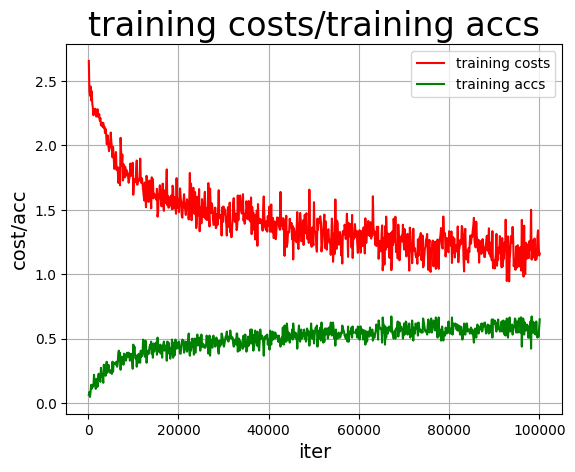

In [15]:
EPOCH_NUM = 2
model_save_dir = "/home/aistudio/data/catdog.inference.model"

for pass_id in range(EPOCH_NUM):
    # 开始训练
    train_cost = 0
    for batch_id, data in enumerate(train_reader()):                        #遍历train_reader的迭代器，并为数据加上索引batch_id
        train_cost,train_acc = exe.run(program=fluid.default_main_program(),#运行主程序
                             feed=feeder.feed(data),                        #喂入一个batch的数据
                             fetch_list=[avg_cost, acc])                    #fetch均方误差和准确率
        if batch_id % 100 == 0:                                             #每100次batch打印一次训练、进行一次测试
            print('Pass:%d, Batch:%d, Cost:%0.5f, Accuracy:%0.5f' % 
            (pass_id, batch_id, train_cost[0], train_acc[0]))
        iter=iter+BATCH_SIZE
        iters.append(iter)
        train_costs.append(train_cost[0])
        train_accs.append(train_acc[0])
    # 开始测试
    test_costs = []                                                         #测试的损失值
    test_accs = []                                                          #测试的准确率
    for batch_id, data in enumerate(test_reader()):
        test_cost, test_acc = exe.run(program=fluid.default_main_program(), #运行测试程序
                                      feed=feeder.feed(data),               #喂入一个batch的数据
                                      fetch_list=[avg_cost, acc])           #fetch均方误差、准确率
        test_costs.append(test_cost[0])                                     #记录每个batch的误差
        test_accs.append(test_acc[0])                                       #记录每个batch的准确率
    test_cost = (sum(test_costs) / len(test_costs))                         #计算误差平均值（误差和/误差的个数）
    test_acc = (sum(test_accs) / len(test_accs))                            #计算准确率平均值（ 准确率的和/准确率的个数）
    print('Test:%d, Cost:%0.5f, ACC:%0.5f' % (pass_id, test_cost, test_acc))
    
    #保存模型
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    fluid.io.save_inference_model(model_save_dir,
                                  ['images'],
                                  [predict],
                                  exe)
print('训练模型保存完成！')
draw_train_process(iters, train_costs,train_accs)


In [16]:
infer_exe = fluid.Executor(place)
inference_scope = fluid.core.Scope() 

In [17]:
def load_image(file):
        #打开图片
        im = Image.open(file)
        #将图片调整为跟训练数据一样的大小  32*32，                   设定ANTIALIAS，即抗锯齿.resize是缩放
        im = im.resize((32, 32), Image.ANTIALIAS)
        #建立图片矩阵 类型为float32
        im = np.array(im).astype(np.float32)
        #矩阵转置 
        im = im.transpose((2, 0, 1))                               
        #将像素值从【0-255】转换为【0-1】
        im = im / 255.0
        #print(im)       
        im = np.expand_dims(im, axis=0)
        # 保持和之前输入image维度一致
        print('im_shape的维度：',im.shape)
        return im

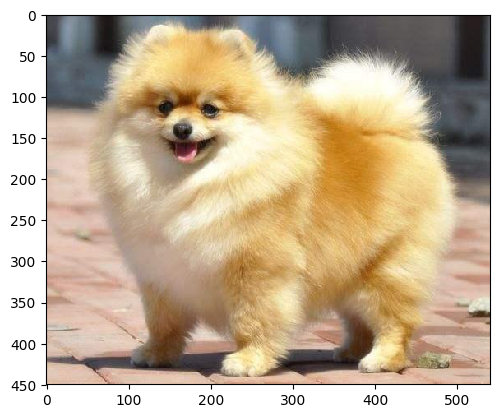

im_shape的维度： (1, 3, 32, 32)
results [array([[3.8982890e-04, 1.2137241e-04, 3.8866907e-02, 1.3048653e-01,
        5.9757210e-02, 5.9600556e-01, 1.3993447e-01, 3.3669543e-02,
        4.5434208e-05, 7.2321948e-04]], dtype=float32)]
infer results: dog


In [18]:
with fluid.scope_guard(inference_scope):
    #从指定目录中加载 推理model(inference model)
    [inference_program, # 预测用的program
     feed_target_names, # 是一个str列表，它包含需要在推理 Program 中提供数据的变量的名称。 
     fetch_targets] = fluid.io.load_inference_model(model_save_dir,#fetch_targets：是一个 Variable 列表，从中我们可以得到推断结果。
                                                    infer_exe)     #infer_exe: 运行 inference model的 executor
    
    infer_path='/home/aistudio/bomei.jpg'
    img = Image.open(infer_path)
    plt.imshow(img)   
    plt.show()    
    
    img = load_image(infer_path)

    results = infer_exe.run(inference_program,                 #运行预测程序
                            feed={feed_target_names[0]: img},  #喂入要预测的img
                            fetch_list=fetch_targets)          #得到推测结果
    print('results',results)
    label_list = [
        "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
        "ship", "truck"
        ]
    print("infer results: %s" % label_list[np.argmax(results[0])])